In [1]:
import warnings
warnings.filterwarnings("ignore")
from utils import aspect_extraction, general, sentiment_extraction, visualizer
import pickle
import pandas as pd

2023-05-23 10:48:02.207085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 10:48:03.336262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-23 10:48:04.521380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-23 10:48:04.571071: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:
import importlib
importlib.reload(general)
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(visualizer)

<module 'utils.visualizer' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/visualizer.py'>

In [3]:
def get_aspects_polarity(pmi):
    pmi["pmi_combined"] = pmi["noun_cat_pmi"]+ pmi["adj_noun_pmi"]
    pmi = pmi[["noun", "adj", "pmi_combined"]]
    pmi["polarity"] = pmi["adj"].apply(lambda x : sentiment_extraction.get_sentiwn_score(x))
    pmi = pmi.sort_values(by = "pmi_combined", ascending=False)[:1000]
    pos = len(pmi[pmi.polarity > 0.1])
    neg = len(pmi[pmi.polarity < -0.1])
    avg = pmi[abs(pmi.polarity) > 0.1]["polarity"].mean()
    return pmi[abs(pmi.polarity) > 0.1], (pos/(pos+neg))*100, (neg/(pos+neg))*100, avg

In [4]:
queries_aspects = {}
aspects_polarity = {}

def save_results(app, aspect, queries_aspects, aspects_polarity, pmi, pos, neg, avg):
    if app not in queries_aspects:
        queries_aspects[app] = {}
    if app not in aspects_polarity:
        aspects_polarity[app] = {}

    aspects = list(pmi[abs(pmi.polarity) > 0.2][["noun", "adj"]].itertuples(index=False, name = None))
    queries_aspects[app][aspect] = aspects
    aspects_polarity[app][aspect] = {}
    aspects_polarity[app][aspect]["pos"] = pos
    aspects_polarity[app][aspect]["neg"] = neg
    aspects_polarity[app][aspect]["avg"] = avg
    return queries_aspects, aspects_polarity

## __Tinder__

In [5]:
tinder_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "tinder", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
tinder_word_category_pmi = aspect_extraction.get_noun_category_pmi(tinder_reviews_by_category)
tinder_word_category_pmi.head()

  0%|          | 0/577214 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.501333
1,attractiveness,aap,0.709722
2,attractiveness,account,0.639157
3,attractiveness,accounts,0.486562
4,attractiveness,after,0.588550


### __Casual sex__

In [6]:
casual_sex_reviews = tinder_reviews_by_category["casual sex"]

In [14]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_adj_noun_pmi = cs_adj_noun_pmi[cs_adj_noun_pmi.adj_noun_pmi > 0]
cs_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20295 [00:00<?, ?it/s]

In [15]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}% avg: {cs_avg}")
cs_pmi.head()

pos: 52.16%, neg: 47.84% avg: -0.034590287927126886


,noun,adj,pmi_combined,polarity
4155,thanks,safe,1.487427,0.160714
15,access,awful,1.360934,-0.214286
3166,prostitutes,horrible,1.335006,-0.625000
2838,play,clear,1.329329,0.166667
1928,mention,upgrade,1.319381,0.113636


### __Relationship__

In [16]:
relationship_reviews = tinder_reviews_by_category["relationship"]

In [18]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_adj_noun_pmi = rel_adj_noun_pmi[rel_adj_noun_pmi.adj_noun_pmi > 0]
rel_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20458 [00:00<?, ?it/s]

In [19]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 53.21%, neg: 46.79%, avg: 0.009145383408186878


,noun,adj,pmi_combined,polarity
3593,tons,bumble,1.311009,-0.250000
667,explanation,false,1.305561,-0.431818
1421,list,difficult,1.212885,-0.687500
241,build,potential,1.208445,-0.125000
3340,term,short,1.151769,-0.152174


### __Friendship__

In [21]:
friendship_reviews = tinder_reviews_by_category["friendship"]

In [22]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
friend_adj_noun_pmi = friend_adj_noun_pmi[friend_adj_noun_pmi.adj_noun_pmi > 0]
friend_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/17716 [00:00<?, ?it/s]

In [23]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 46.04%, neg: 53.96%, avg: -0.07201910159381791


,noun,adj,pmi_combined,polarity
852,order,everyday,1.065602,0.250000
329,friendship,genuine,1.003029,0.117667
348,friendship,random,0.993062,0.125000
355,friendship,dislike,0.993062,-0.375000
322,friendship,interested,0.983760,0.300000


### __Curiosity__

In [24]:
curiosity_reviews = tinder_reviews_by_category["curiosity"]

In [25]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
cur_adj_noun_pmi = cur_adj_noun_pmi[cur_adj_noun_pmi.adj_noun_pmi > 0]
cur_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19404 [00:00<?, ?it/s]

In [26]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(cur_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 40.17%, neg: 59.83%, avg: -0.10468927539155275


,noun,adj,pmi_combined,polarity
140,curiosity,funny,1.097250,-0.150
134,curiosity,missed,1.076197,-0.125
135,curiosity,sudden,1.076197,-0.500
141,curiosity,bumble,1.044618,-0.250
143,curiosity,random,1.044618,0.125


### __Women__

In [27]:
women_reviews = tinder_reviews_by_category["women"]

In [28]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
women_adj_noun_pmi = women_adj_noun_pmi[women_adj_noun_pmi.adj_noun_pmi > 0]
women_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "women"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20900 [00:00<?, ?it/s]

In [29]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 51.88%, neg: 48.12%, avg: -0.00305149179879444


,noun,adj,pmi_combined,polarity
413,ego,sad,1.751171,-0.625000
415,ego,expensive,1.380801,0.500000
1905,pics,false,1.348345,-0.431818
412,ego,low,1.250931,-0.250000
2161,selling,expensive,1.229911,0.500000


### __Men__

In [30]:
men_reviews = tinder_reviews_by_category["men"]

In [31]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_adj_noun_pmi = men_adj_noun_pmi[men_adj_noun_pmi.adj_noun_pmi > 0]
men_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "men"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21816 [00:00<?, ?it/s]

In [32]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 47.94%, neg: 52.06%, avg: -0.030984836420761344


,noun,adj,pmi_combined,polarity
2530,pics,false,1.326305,-0.431818
611,explanation,false,1.229856,-0.431818
191,body,unlimited,1.223115,-0.250000
695,female,awful,1.218737,-0.214286
1578,male,inactive,1.180879,-0.287500


### __Self Esteem__

In [33]:
self_esteem_reviews = tinder_reviews_by_category["self esteem"]

In [34]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_esteem_reviews)
self_adj_noun_pmi = self_adj_noun_pmi[self_adj_noun_pmi.adj_noun_pmi > 0]
self_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/17100 [00:00<?, ?it/s]

In [35]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="self", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 38.46%, neg: 61.54%, avg: -0.11270451038036988


,noun,adj,pmi_combined,polarity
1272,user,friendly,1.180261,0.175000
1034,subscribe,sad,1.150460,-0.625000
1028,subscribe,bad,0.997021,-0.595588
1027,subscribe,good,0.991168,0.564815
988,response,verify,0.892895,0.156250


### __Attractiveness (appearence)__

In [36]:
attractiveness_reviews = tinder_reviews_by_category["attractiveness"]

In [37]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_adj_noun_pmi = attr_adj_noun_pmi[attr_adj_noun_pmi.adj_noun_pmi > 0]
attr_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20564 [00:00<?, ?it/s]

In [38]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 31.77%, neg: 68.23%, avg: -0.1567089768596397


,noun,adj,pmi_combined,polarity
1002,photos,previous,1.310727,-0.166667
72,attractiveness,previous,1.289735,-0.166667
65,attractiveness,attractive,1.231402,0.416667
61,attractiveness,spent,1.164735,0.125000
73,attractiveness,disappointing,1.143902,-0.500000


### __Attractiveness (intelligence)__

In [39]:
intelligence_reviews = tinder_reviews_by_category["intelligence"]

In [40]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_adj_noun_pmi = int_adj_noun_pmi[int_adj_noun_pmi.adj_noun_pmi > 0]
int_pmi = tinder_word_category_pmi[tinder_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19691 [00:00<?, ?it/s]

In [41]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="tinder", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 30.52%, neg: 69.48%, avg: -0.17153020577109226


,noun,adj,pmi_combined,polarity
482,intelligence,artificial,1.444444,-0.333333
481,intelligence,horrible,1.133333,-0.625000
486,intelligence,potential,1.063492,-0.125000
480,intelligence,hard,1.037037,-0.204545
479,intelligence,scam,1.026144,-0.125000


## __Bumble__

In [55]:
bumble_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "bumble", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
bumble_word_category_pmi = aspect_extraction.get_noun_category_pmi(bumble_reviews_by_category)
bumble_word_category_pmi.head()

  0%|          | 0/102380 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.420972
1,attractiveness,absolutely,0.494088
2,attractiveness,access,0.529772
3,attractiveness,account,0.529595
4,attractiveness,accounts,0.490613


### __Casual sex__

In [43]:
casual_sex_reviews = bumble_reviews_by_category["casual sex"]

In [56]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_adj_noun_pmi = cs_adj_noun_pmi[cs_adj_noun_pmi.adj_noun_pmi > 0]
cs_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18786 [00:00<?, ?it/s]

In [57]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}%, avg: {cs_avg}")
cs_pmi.head()

pos: 39.00%, neg: 61.00%, avg: -0.07310264334481843


,noun,adj,pmi_combined,polarity
1615,members,horrible,1.125650,-0.625
1285,internet,potential,1.047229,-0.125
1608,members,interested,1.044168,0.300
79,answer,crazy,1.013392,-0.125
1602,members,bumble,1.003911,-0.250


### __Relationship__

In [58]:
relationship_reviews = bumble_reviews_by_category["relationship"]

In [62]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_adj_noun_pmi = rel_adj_noun_pmi[rel_adj_noun_pmi.adj_noun_pmi > 0]
rel_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19600 [00:00<?, ?it/s]

In [63]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 46.49%, neg: 53.51%, avg: -0.05067788339392699


,noun,adj,pmi_combined,polarity
1390,lives,black,1.487437,-0.284091
1388,lives,unable,1.198975,-0.416667
1387,lives,complete,1.198975,0.300000
1386,lives,true,1.198975,0.241667
1376,lives,stupid,1.175898,-0.343750


### __Friendship__

In [64]:
friendship_reviews = bumble_reviews_by_category["friendship"]

In [65]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
frind_adj_noun_pmi = friend_adj_noun_pmi[friend_adj_noun_pmi.adj_noun_pmi > 0]
friend_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21216 [00:00<?, ?it/s]

In [66]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 45.21%, neg: 54.79%, avg: -0.05928506692004593


,noun,adj,pmi_combined,polarity
2845,details,helpful,1.372358,0.250000
2846,details,small,1.372358,-0.192308
2848,details,negative,1.372358,-0.489583
2817,details,funny,1.258072,-0.150000
2772,details,useless,1.188936,-0.500000


### __Curiosity__

In [67]:
curiosity_reviews = bumble_reviews_by_category["curiosity"]

In [68]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
cur_adj_noun_pmi = cur_adj_noun_pmi[cur_adj_noun_pmi.adj_noun_pmi > 0]
curiosity_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19404 [00:00<?, ?it/s]

In [69]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(curiosity_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 35.23%, neg: 64.77%, avg: -0.12307286053523792


,noun,adj,pmi_combined,polarity
90,blm,black,1.411142,-0.284091
408,curiosity,rare,1.295455,-0.104167
405,curiosity,bother,1.147727,-0.281250
403,curiosity,wrong,1.118182,-0.567308
398,curiosity,fake,1.041711,-0.406250


### __Women__

In [70]:
women_reviews = bumble_reviews_by_category["women"]

In [71]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
women_adj_noun_pmi = women_adj_noun_pmi[women_adj_noun_pmi.adj_noun_pmi > 0]
women_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "women"].merge(women_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20972 [00:00<?, ?it/s]

In [72]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 52.97%, neg: 47.03%, avg: 0.001148527154551959


,noun,adj,pmi_combined,polarity
1854,nothing,sad,1.247397,-0.625000
1855,nothing,worthless,1.247397,-0.500000
1853,nothing,perfect,1.247397,0.375000
1852,nothing,rare,1.164064,-0.104167
1850,nothing,complete,1.138022,0.300000


### __Men__

In [90]:
men_reviews = bumble_reviews_by_category["men"]

In [74]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_adj_noun_pmi = men_adj_noun_pmi[men_adj_noun_pmi.adj_noun_pmi > 0]
men_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "men"].merge(men_adj_noun_pmi, on = ["noun"])

  0%|          | 0/22066 [00:00<?, ?it/s]

In [75]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 44.72%, neg: 55.28%, avg: -0.05545480806979571


,noun,adj,pmi_combined,polarity
206,advantage,average,1.720354,-0.114583
5239,queue,aware,1.589402,0.562500
5266,rating,average,1.589402,-0.114583
5580,respect,friendly,1.553687,0.175000
5037,problems,true,1.553687,0.241667


### __Self Esteem__

In [76]:
self_reviews = bumble_reviews_by_category["self esteem"]

In [77]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_reviews)
self_adj_noun_pmi = self_adj_noun_pmi[self_adj_noun_pmi.adj_noun_pmi > 0]
self_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18518 [00:00<?, ?it/s]

In [78]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="self esteem", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 40.56%, neg: 59.44%, avg: -0.07597984038142695


,noun,adj,pmi_combined,polarity
140,blm,black,1.638678,-0.284091
2495,success,tried,1.224428,0.113636
3166,year,short,1.215614,-0.152174
3151,worse,other,1.037077,-0.218750
2435,stars,negative,1.017298,-0.489583


### __Attractiveness (appearence)__

In [79]:
attractiveness_reviews = bumble_reviews_by_category["attractiveness"]

In [80]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_adj_noun_pmi = attr_adj_noun_pmi[attr_adj_noun_pmi.adj_noun_pmi > 0]
attr_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20400 [00:00<?, ?it/s]

In [81]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 44.80%, neg: 55.20%, avg: -0.0493503680271264


,noun,adj,pmi_combined,polarity
135,blm,black,1.481414,-0.284091
90,attractiveness,low,1.292494,-0.250000
79,attractiveness,attractive,1.205348,0.416667
94,attractiveness,honest,1.193729,0.250000
82,attractiveness,interesting,1.178534,0.343750


### __Attractiveness (intelligence)__

In [82]:
intelligence_reviews = bumble_reviews_by_category["intelligence"]

In [83]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_adj_noun_pmi = int_adj_noun_pmi[int_adj_noun_pmi.adj_noun_pmi > 0]
int_pmi = bumble_word_category_pmi[bumble_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19095 [00:00<?, ?it/s]

In [84]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="bumble", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 37.24%, neg: 62.76%, avg: -0.11967173299519285


,noun,adj,pmi_combined,polarity
135,blm,black,1.473557,-0.284091
2199,refund,false,1.159535,-0.431818
2197,refund,negative,1.114081,-0.489583
2195,refund,sad,1.079990,-0.625000
2196,refund,hidden,1.079990,-0.178571


## __Hinge__

In [94]:
hinge_reviews_by_category = aspect_extraction.get_reviews_by_category(app = "hinge", categories = ["casual sex", "relationship", "friendship", "curiosity", "women", "men", "self esteem", "attractiveness", "intelligence"])
hinge_word_category_pmi = aspect_extraction.get_noun_category_pmi(hinge_reviews_by_category)
hinge_word_category_pmi.head()

  0%|          | 0/52992 [00:00<?, ?it/s]

,category,noun,noun_cat_pmi
0,attractiveness,a,0.372776
1,attractiveness,absolute,1.000000
2,attractiveness,absolutely,0.328914
3,attractiveness,access,0.392717
4,attractiveness,account,0.381636


### __Casual sex__

In [96]:
casual_sex_reviews = hinge_reviews_by_category["casual sex"]

In [97]:
cs_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(casual_sex_reviews)
cs_adj_noun_pmi = cs_adj_noun_pmi[cs_adj_noun_pmi.adj_noun_pmi > 0]
cs_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "casual sex"].merge(cs_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19740 [00:00<?, ?it/s]

In [98]:
cs_pmi, cs_pos, cs_neg, cs_avg = get_aspects_polarity(cs_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="casual sex", pmi= cs_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cs_pos, neg=cs_neg, avg=cs_avg)
print(f"pos: {cs_pos:.2f}%, neg: {cs_neg:.2f}%, avg: {cs_avg}")
cs_pmi.head()

pos: 45.83%, neg: 54.17%, avg: -0.05191184176718044


,noun,adj,pmi_combined,polarity
2188,services,sexual,1.231377,0.208333
2148,sell,sexual,0.958754,0.208333
1737,pop,sick,0.892755,-0.250000
1736,pop,fine,0.840807,0.212500
2372,swipe,meaningful,0.830600,0.125000


### __Relationship__

In [99]:
relationship_reviews = hinge_reviews_by_category["relationship"]

In [100]:
rel_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(relationship_reviews)
rel_adj_noun_pmi = rel_adj_noun_pmi[rel_adj_noun_pmi.adj_noun_pmi > 0]
rel_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "relationship"].merge(rel_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21780 [00:00<?, ?it/s]

In [101]:
rel_pmi, rel_pos, rel_neg, rel_avg = get_aspects_polarity(rel_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="relationship", pmi= rel_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= rel_pos, neg=rel_neg, avg=rel_avg)
print(f"pos: {rel_pos:.2f}%, neg: {rel_neg:.2f}%, avg: {rel_avg}")
rel_pmi.head()

pos: 62.92%, neg: 37.08%, avg: 0.06743423853908508


,noun,adj,pmi_combined,polarity
1494,offer,fine,1.174844,0.212500
1493,offer,sexual,1.102117,0.208333
2156,relationship,meaningful,0.999683,0.125000
2225,reply,glad,0.987774,0.125000
2201,relationship,small,0.986250,-0.192308


### __Friendship__

In [102]:
friendship_reviews = hinge_reviews_by_category["friendship"]

In [103]:
friend_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(friendship_reviews)
friend_adj_noun_pmi = friend_adj_noun_pmi[friend_adj_noun_pmi.adj_noun_pmi > 0]
friend_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "friendship"].merge(friend_adj_noun_pmi, on = ["noun"])

  0%|          | 0/19897 [00:00<?, ?it/s]

In [104]:
friend_pmi, friend_pos, friend_neg, friend_avg = get_aspects_polarity(friend_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="friendship", pmi= friend_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= friend_pos, neg=friend_neg, avg=friend_avg)
print(f"pos: {friend_pos:.2f}%, neg: {friend_neg:.2f}%, avg: {friend_avg}")
friend_pmi.head()

pos: 54.09%, neg: 45.91%, avg: -0.023141553930730384


,noun,adj,pmi_combined,polarity
1903,services,sexual,1.485565,0.208333
1872,sell,sexual,1.169506,0.208333
505,fact,unlimited,0.885775,-0.250000
1877,sell,shame,0.798474,-0.482143
1876,sell,unlimited,0.798474,-0.250000


### __Curiosity__

In [105]:
curiosity_reviews = hinge_reviews_by_category["curiosity"]

In [106]:
cur_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(curiosity_reviews)
cur_adj_noun_pmi = cur_adj_noun_pmi[cur_adj_noun_pmi.adj_noun_pmi > 0]
cur_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "curiosity"].merge(cur_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20710 [00:00<?, ?it/s]

In [107]:
cur_pmi, cur_pos, cur_neg, cur_avg = get_aspects_polarity(cur_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="curiosity", pmi= cur_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= cur_pos, neg=cur_neg, avg=cur_avg)
print(f"pos: {cur_pos:.2f}%, neg: {cur_neg:.2f}%, avg: {cur_avg}")
cur_pmi.head()

pos: 47.67%, neg: 52.33%, avg: -0.0398935539195112


,noun,adj,pmi_combined,polarity
2021,services,sexual,1.485478,0.208333
15,access,sick,0.966239,-0.250000
525,fact,unlimited,0.845394,-0.250000
1283,notification,compatible,0.727726,0.416667
1923,report,stupid,0.717468,-0.343750


### __Women__

In [108]:
women_reviews = hinge_reviews_by_category["women"]

In [109]:
women_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(women_reviews)
wome_adj_noun_pmi = women_adj_noun_pmi[women_adj_noun_pmi.adj_noun_pmi > 0]
women_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "women"].merge(women_adj_noun_pmi, on = ["noun"])

  0%|          | 0/20400 [00:00<?, ?it/s]

In [110]:
women_pmi, women_pos, women_neg, women_avg = get_aspects_polarity(women_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="women", pmi= women_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= women_pos, neg=women_neg, avg=women_avg)
print(f"pos: {women_pos:.2f}%, neg: {women_neg:.2f}%, avg: {women_avg}")
women_pmi.head()

pos: 59.56%, neg: 40.44%, avg: 0.06837142569308755


,noun,adj,pmi_combined,polarity
5699,hour,stupid,1.591393,-0.343750
5503,height,select,1.556428,0.208333
5674,hour,happy,1.409575,0.562500
5291,half,stupid,1.334709,-0.343750
13015,size,prefer,1.325659,0.312500


### __Men__

In [111]:
men_reviews = hinge_reviews_by_category["men"]

In [112]:
men_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(men_reviews)
men_adj_noun_pmi = men_adj_noun_pmi[men_adj_noun_pmi.adj_noun_pmi > 0]
men_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "men"].merge(men_adj_noun_pmi, on = ["noun"])

  0%|          | 0/22374 [00:00<?, ?it/s]

In [113]:
men_pmi, men_pos, men_neg, men_avg = get_aspects_polarity(men_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="men", pmi= men_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= men_pos, neg=men_neg, avg=men_avg)
print(f"pos: {men_pos:.2f}%, neg: {men_neg:.2f}%, avg: {men_avg}")
men_pmi.head()

pos: 55.76%, neg: 44.24%, avg: 0.023781491934596506


,noun,adj,pmi_combined,polarity
1690,members,preferred,1.331917,0.375000
862,gender,fine,1.310809,0.212500
3563,way,preferred,1.149625,0.375000
1165,job,awful,1.125320,-0.214286
3061,star,expensive,1.125320,0.500000


### __Self Esteem__

In [114]:
self_reviews = hinge_reviews_by_category["self esteem"]

In [115]:
self_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(self_reviews)
self_adj_noun_pmi = self_adj_noun_pmi[self_adj_noun_pmi.adj_noun_pmi > 0]
self_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "self esteem"].merge(self_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18816 [00:00<?, ?it/s]

In [116]:
self_pmi, self_pos, self_neg, self_avg = get_aspects_polarity(self_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="self esteem", pmi= self_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= self_pos, neg=self_neg, avg=self_avg)
print(f"pos: {self_pos:.2f}%, neg: {self_neg:.2f}%, avg: {self_avg}")
self_pmi.head()

pos: 49.02%, neg: 50.98%, avg: -0.03512853640904748


,noun,adj,pmi_combined,polarity
1820,services,sexual,1.486970,0.208333
1759,sell,sexual,1.170911,0.208333
1918,start,easier,0.862165,0.104167
386,fact,unlimited,0.833539,-0.250000
1761,sell,unlimited,0.778054,-0.250000


### __Attractiveness (appearence)__

In [117]:
attractiveness_reviews = hinge_reviews_by_category["attractiveness"]

In [118]:
attr_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(attractiveness_reviews)
attr_adj_noun_pmi = attr_adj_noun_pmi[attr_adj_noun_pmi.adj_noun_pmi > 0]
attr_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "attractiveness"].merge(attr_adj_noun_pmi, on = ["noun"])

  0%|          | 0/21037 [00:00<?, ?it/s]

In [119]:
attr_pmi, attr_pos, attr_neg, attr_avg = get_aspects_polarity(attr_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="attractiveness", pmi= attr_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= attr_pos, neg=attr_neg, avg=attr_avg)
print(f"pos: {attr_pos:.2f}%, neg: {attr_neg:.2f}%, avg: {attr_avg}")
attr_pmi.head()

pos: 51.59%, neg: 48.41%, avg: -0.006349451509591566


,noun,adj,pmi_combined,polarity
2144,services,sexual,1.411414,0.208333
14,absolute,huge,1.318182,-0.125000
12,absolute,low,1.198864,-0.250000
13,absolute,average,1.198864,-0.114583
11,absolute,attractiveness,1.132576,0.562500


### __Attractiveness (intelligence)__

In [120]:
intelligence_reviews = hinge_reviews_by_category["intelligence"]

In [121]:
int_adj_noun_pmi = aspect_extraction.get_adj_noun_pmi(intelligence_reviews)
int_adj_noun_pmi = int_adj_noun_pmi[int_adj_noun_pmi.adj_noun_pmi > 0]
int_pmi = hinge_word_category_pmi[hinge_word_category_pmi.category == "intelligence"].merge(int_adj_noun_pmi, on = ["noun"])

  0%|          | 0/18912 [00:00<?, ?it/s]

In [122]:
int_pmi, int_pos, int_neg, int_avg = get_aspects_polarity(int_pmi)
queries_aspects, aspects_polarity = save_results(app="hinge", aspect="intelligence", pmi= int_pmi, aspects_polarity = aspects_polarity, queries_aspects = queries_aspects, pos= int_pos, neg=int_neg, avg=int_avg)
print(f"pos: {int_pos:.2f}%, neg: {int_neg:.2f}%, avg: {int_avg}")
int_pmi.head()

pos: 51.11%, neg: 48.89%, avg: -0.024954842011303668


,noun,adj,pmi_combined,polarity
1872,services,sexual,1.486325,0.208333
1915,sites,funny,0.866735,-0.150000
1959,start,easier,0.861521,0.104167
532,fact,unlimited,0.846242,-0.250000
182,bots,funny,0.841664,-0.150000


In [123]:
with open("data/pmi_query_aspects.pickle", "wb+") as f:
    pickle.dump(queries_aspects, f)

In [124]:
with open("data/pmi_aspects_polarities.pickle", "wb+") as f:
    pickle.dump(aspects_polarity, f)

## __Comparing__

In [125]:
with open("data/pmi_aspects_polarities.pickle", "rb+") as f:
    dating_app_polarities = pickle.load(f)

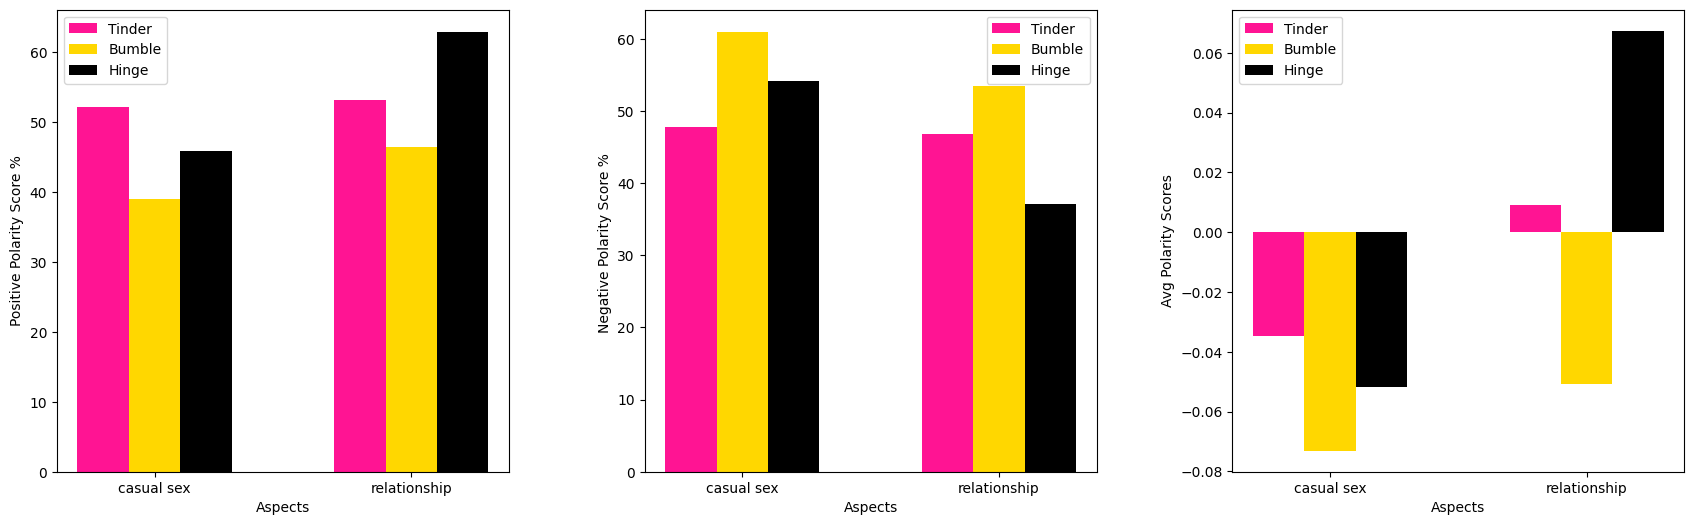

In [126]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects = ["casual sex", "relationship"], figsize=(21,6))

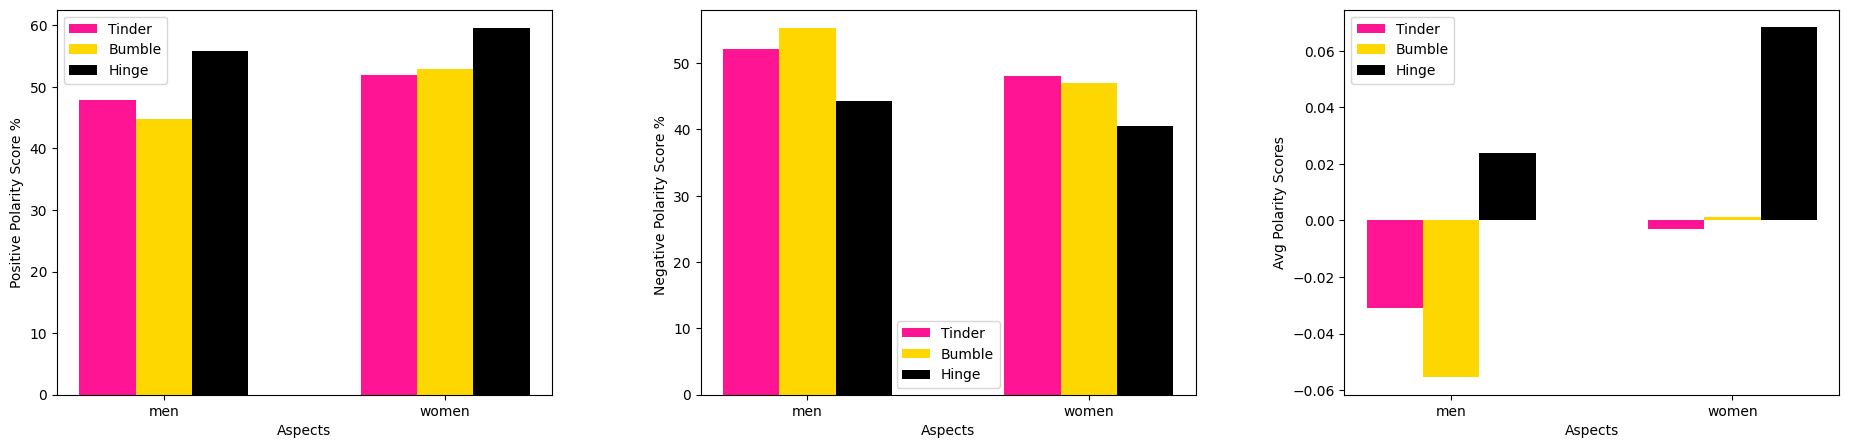

In [127]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["men", "women"], figsize=(23,5))

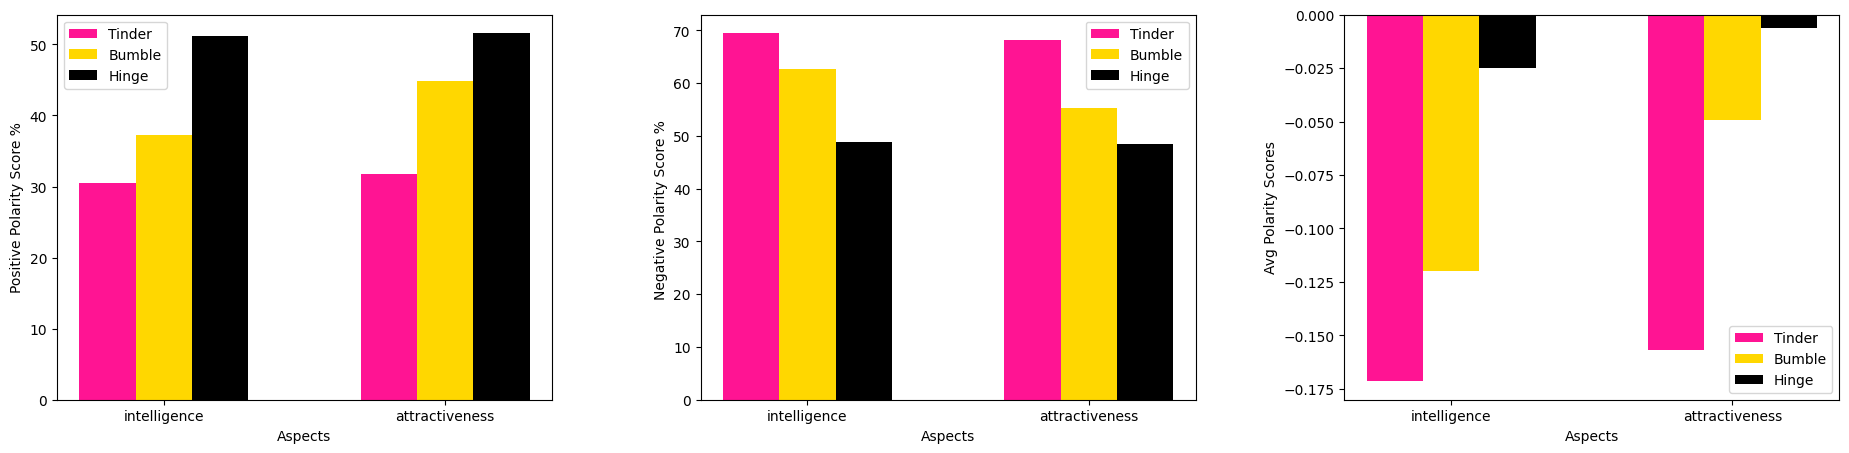

In [128]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["intelligence", "attractiveness"], figsize=(23,5))

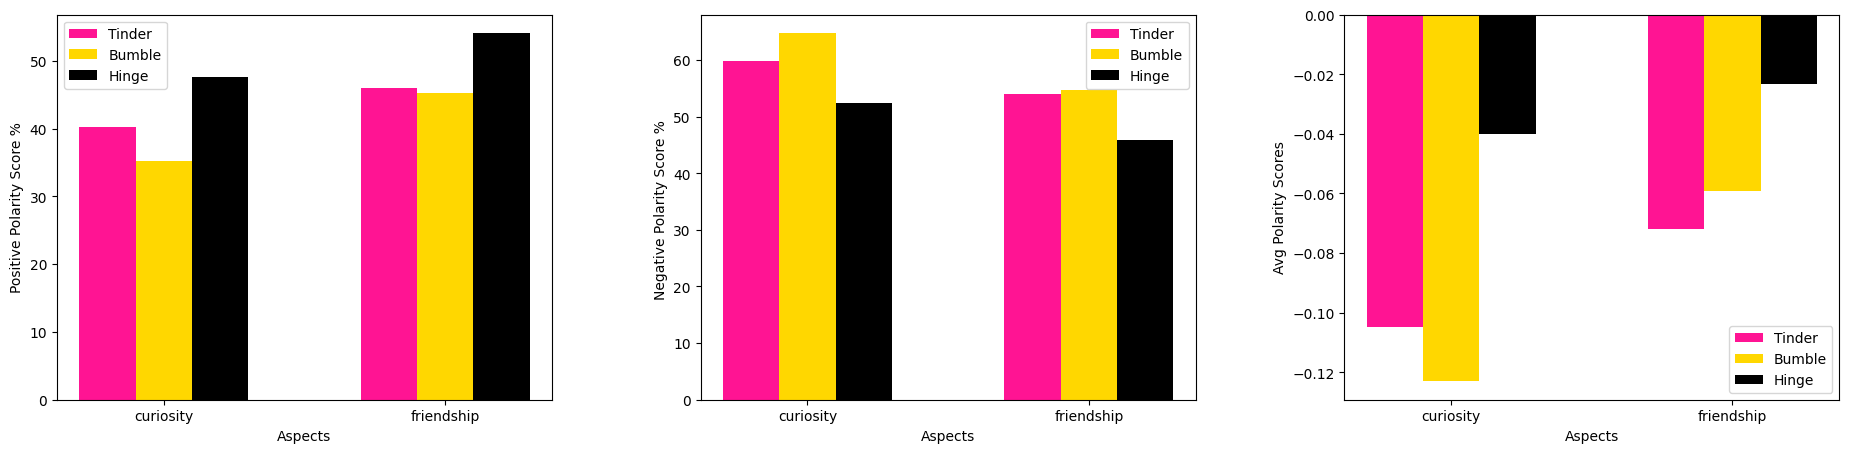

In [129]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["curiosity", "friendship"], figsize=(23,5))